# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Loading dataset

In [4]:
# load the dataset 
data = pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Cleaning
1.Identify and handle missing values.

2.Use IQR to detect and handle outliers.

3.Evaluate multicollinearity using correlation matrix.

In [6]:
data.shape

(6362620, 11)

In [7]:
data.size

69988820

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
data.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [12]:
data.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [14]:
# Check for missing values
data.isnull().sum().sum()

0

In [15]:
# Check for missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Handle Outliers
boxplot for outlier

<Axes: >

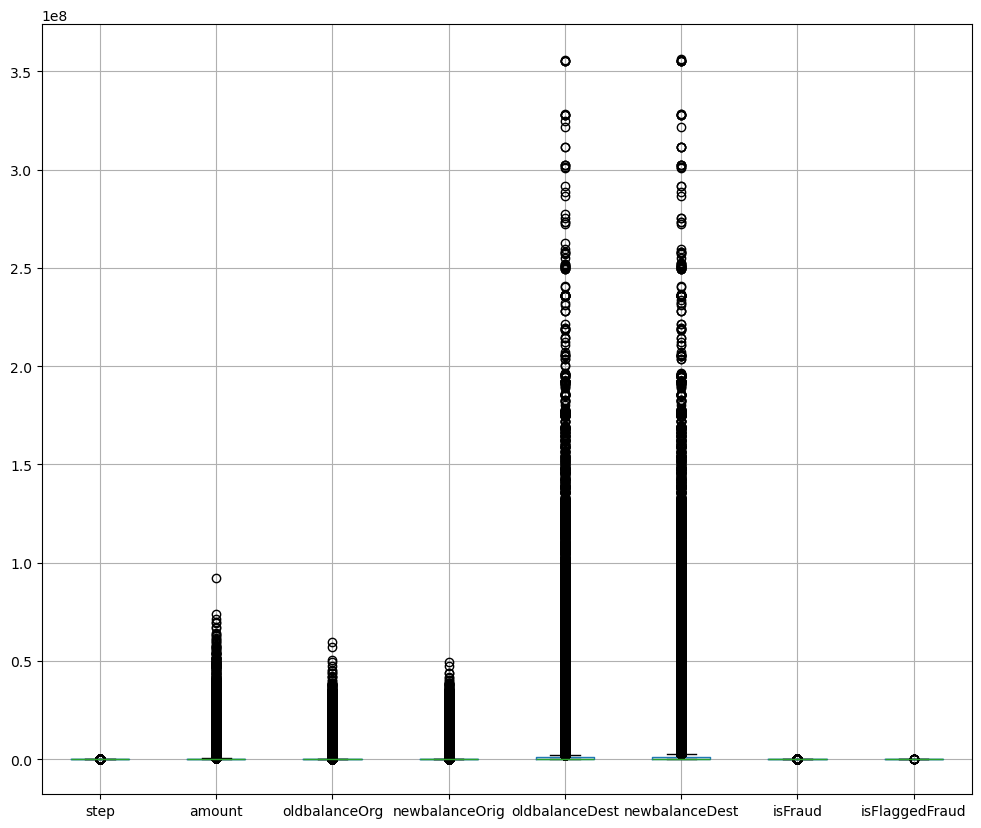

In [17]:
plt.figure(figsize=(12,10))                  # to change the figure size
data.boxplot()                               # to check the outlier for all columns

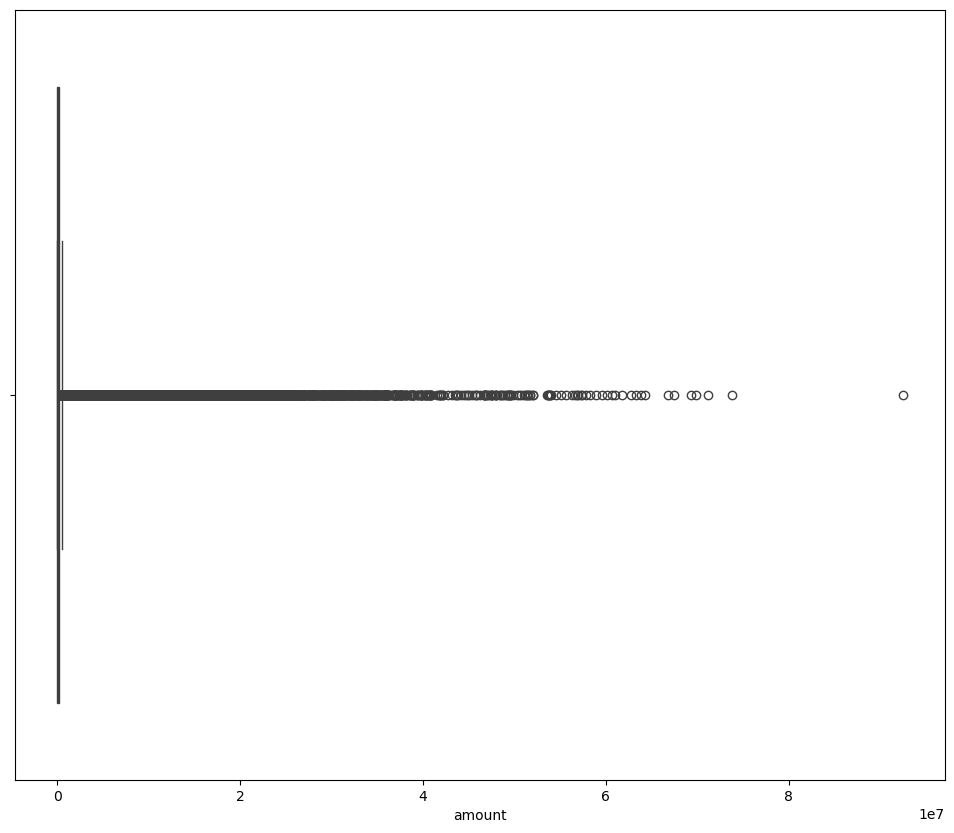

In [18]:
plt.figure(figsize=(12,10))               # to change the figure size
sns.boxplot(x="amount",data=data)        # to check the outlier for specific column 
plt.show()

In [19]:
# Calculate first and third quartiles for amount column
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
Q1

13389.57

In [21]:
Q3

208721.4775

In [22]:
IQR

195331.9075

In [23]:
# Define fence/bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [24]:
lower

-279608.29125

In [25]:
upper

501719.33875

# Filter out outliers

In [27]:
data1 = data[~((data['amount'] < lower) | (data['amount'] > upper))]

<Axes: xlabel='amount'>

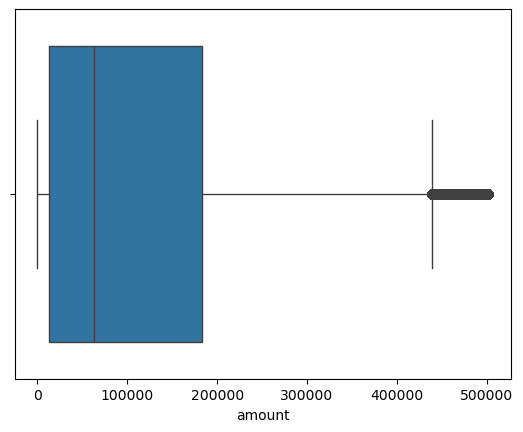

In [28]:
sns.boxplot(x="amount",data=data1)  

# Evaluate multicollinearity using correlation matrix

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
# Identifying categorical columns
data2 = data.select_dtypes(include=['object']).columns
data2

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [33]:
for i in data2:
    data[i]=le.fit_transform(data[i])

another way

In [35]:
l1=le.fit_transform(data["type"])
l2=le.fit_transform(data["nameOrig"])
l3=le.fit_transform(data["nameDest"])

In [36]:
data["type"]=l1
data["nameOrig"]=l2
data["nameDest"]=l3

In [37]:
data.head() 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [38]:
# Correlation matrix
data.corr()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


<Axes: >

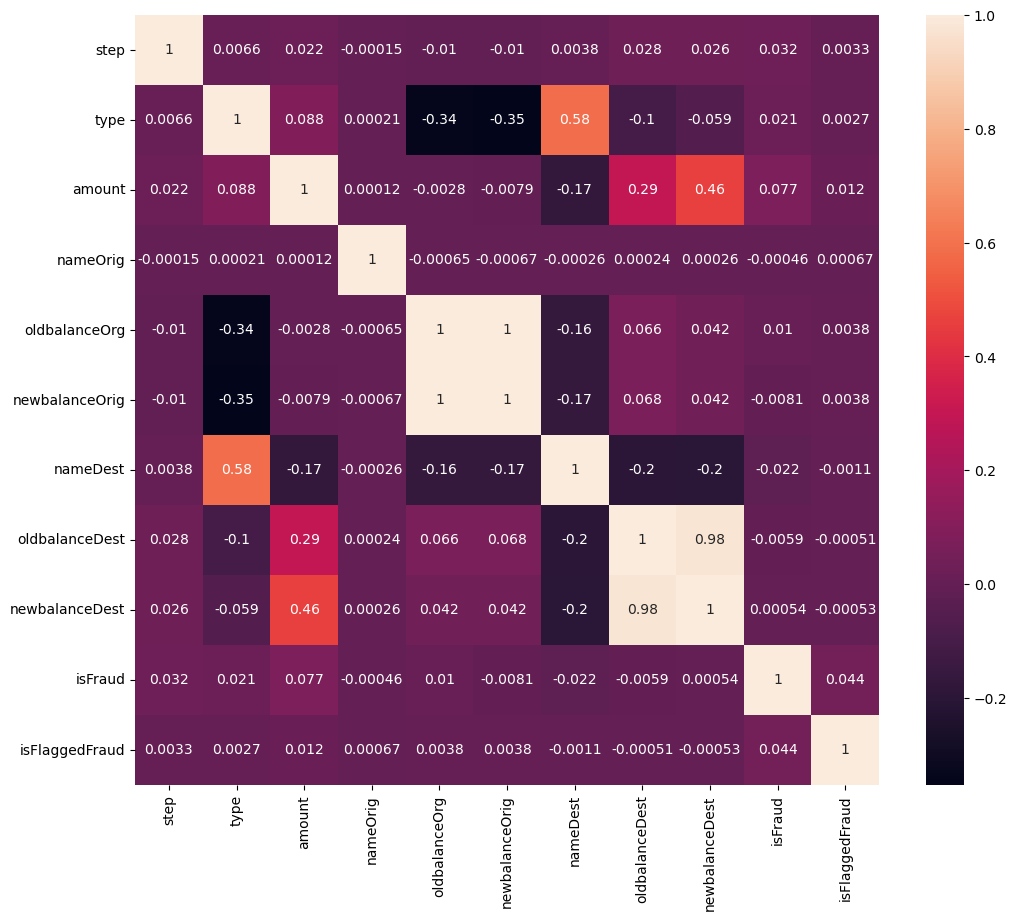

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

# Model Selection
 

In [41]:
#Splitting the dataset into features and target variable

x = data.drop(['isFraud'], axis=1)  # drop target variable , axis=1 for column and axis=0 for row
y = data['isFraud']           

In [ ]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6235367, 10)
(127253, 10)
(6235367,)
(127253,)


# fit the Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score,accuracy_score

In [50]:
y_true,y_pred=y_test,lr.predict(x_test)

In [51]:
lr.score(x_train,y_train)*100

99.91158499571877

In [52]:
lr.score(x_test,y_test)*100

99.91355803006608

In [53]:
accuracy_score(y_true,y_pred)*100

99.91355803006608

In [54]:
precision_score(y_true,y_pred)*100

80.24691358024691

In [55]:
recall_score(y_true,y_pred)*100

40.88050314465409

In [56]:
confusion_matrix(y_true,y_pred)

array([[127078,     16],
       [    94,     65]], dtype=int64)

In [57]:
f1_score(y_true,y_pred)*100

54.166666666666664

In [58]:
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    127094\n           1       0.80      0.41      0.54       159\n\n    accuracy                           1.00    127253\n   macro avg       0.90      0.70      0.77    127253\nweighted avg       1.00      1.00      1.00    127253\n'

Text(50.722222222222214, 0.5, 'Predicted')

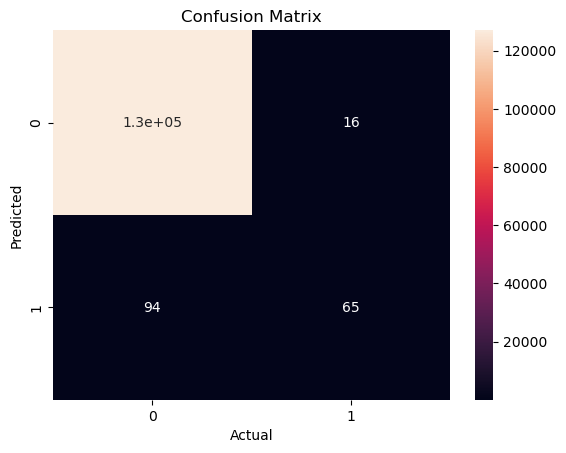

In [59]:
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Key Factors Analysis

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 

In [137]:
# Create and fit the model with optimizations
model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
model.fit(x_train,y_train)

In [101]:
# Get feature importances
importances = model.feature_importances_

In [103]:
# Create a DataFrame for visualization
feature_importance_data = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importance_data = feature_importance_df.sort_values(by='Importance', ascending=False)

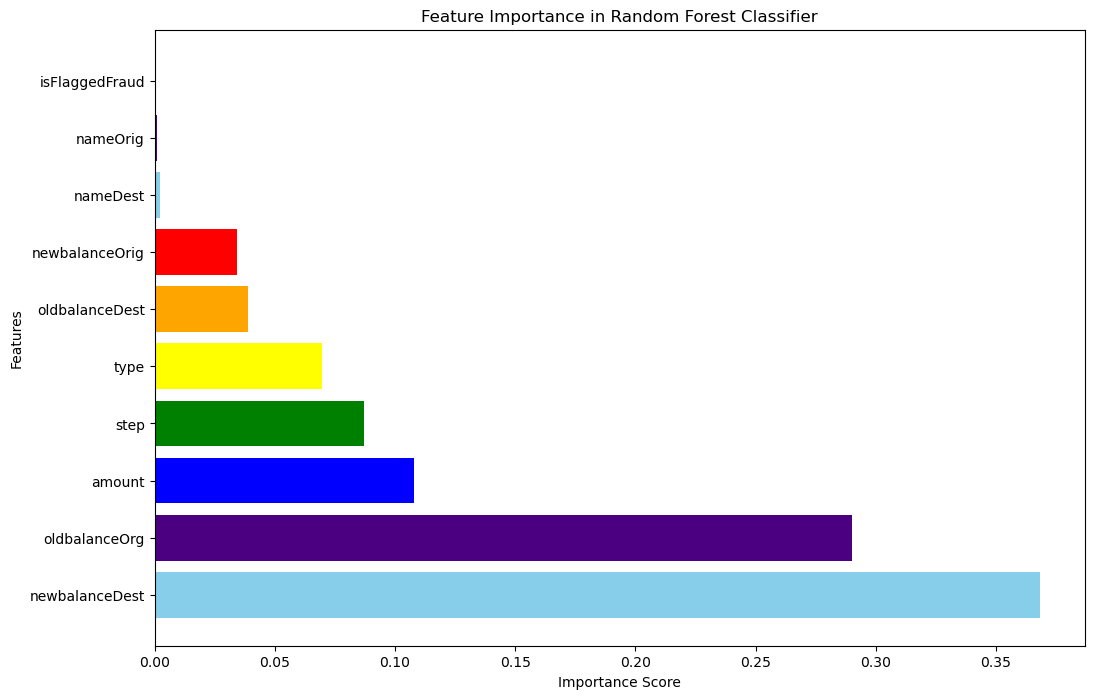

In [125]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_data['Feature'], feature_importance_data['Importance'], color=['skyblue','indigo','blue','green','yellow','orange','red'])
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [127]:
# This section would be more about documentation
with open('prevention_strategies.txt', 'w') as file:
    file.write("Suggestions for preventing fraud based on model findings:\n")
    file.write("- More stringent transaction monitoring on high-risk accounts.\n")
    file.write("- Implement machine learning algorithms for real-time risk scoring.\n")


In [129]:
# Monitoring efficacy
monitoring_plan = """
Plan to evaluate implemented strategies:
1. Establish Metrics (e.g., reduction in fraud cases).
2. Regularly review case studies of flagged transactions.
3. Adapt models based on new fraud patterns.
"""
print(monitoring_plan)



Plan to evaluate implemented strategies:
1. Establish Metrics (e.g., reduction in fraud cases).
2. Regularly review case studies of flagged transactions.
3. Adapt models based on new fraud patterns.

